# 1. Install Dependencies and Setup

In [39]:
import tensorflow as tf
import os

In [40]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [41]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [42]:
data_dir = r"D:\snippy\data" 

# 2. Load Data

In [43]:
BATCH_SIZE = 26
base_dir = r"D:\snippy\data" 

train_ = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    labels='inferred',
    label_mode="int",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.01,
    subset="training"
    )

test_datagen=tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    labels='inferred',
    label_mode="int",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.9,
    subset="training"
    )



Found 156 files belonging to 52 classes.
Using 155 files for training.
Found 156 files belonging to 52 classes.
Using 16 files for training.


# 3. Scale Data

In [44]:
#Normalising the image

train_ = 0train_.map(lambda x,y: (x/255, y))

In [23]:

train_

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 4. Build Deep Learning Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(52, activation='softmax'))

In [50]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# 4. Training the model

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train_, epochs=15, verbose=2, validation_data=test_datagen)

Epoch 1/15
6/6 - 2s - loss: 4.3020 - accuracy: 0.0258 - val_loss: 39.5812 - val_accuracy: 0.1250 - 2s/epoch - 285ms/step
Epoch 2/15
6/6 - 1s - loss: 3.8097 - accuracy: 0.2065 - val_loss: 25.3012 - val_accuracy: 0.3750 - 514ms/epoch - 86ms/step
Epoch 3/15
6/6 - 1s - loss: 3.3668 - accuracy: 0.3355 - val_loss: 49.4115 - val_accuracy: 0.6250 - 538ms/epoch - 90ms/step
Epoch 4/15
6/6 - 0s - loss: 2.3597 - accuracy: 0.5032 - val_loss: 14.7438 - val_accuracy: 0.8125 - 473ms/epoch - 79ms/step
Epoch 5/15
6/6 - 0s - loss: 1.1223 - accuracy: 0.7290 - val_loss: 2.5628 - val_accuracy: 0.8125 - 472ms/epoch - 79ms/step
Epoch 6/15
6/6 - 0s - loss: 0.4025 - accuracy: 0.8839 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 481ms/epoch - 80ms/step
Epoch 7/15
6/6 - 0s - loss: 0.2957 - accuracy: 0.9290 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 488ms/epoch - 81ms/step
Epoch 8/15
6/6 - 0s - loss: 0.1484 - accuracy: 0.9548 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 489ms/epoch - 82ms/step
Epoch 9/15

# 5. Testing the model

In [55]:
model.evaluate(test_datagen)

1/1 [==============================] - 0s 162ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [29]:

y = model.predict(test_datagen)
np.argmax(y[9])
y[8]


1/1 [==============================] - 0s 295ms/step


array([1.85284262e-16, 9.02994634e-06, 7.40823097e-11, 4.88441572e-07,
       1.37116345e-08, 2.75862133e-09, 4.72247658e-11, 8.55709823e-06,
       6.65696526e-11, 3.77412251e-12, 1.55484486e-10, 9.37053495e-13,
       1.17793969e-10, 8.30072344e-10, 2.70516165e-09, 1.45085562e-06,
       7.72611905e-11, 9.99980330e-01, 4.64145107e-13, 5.54959594e-12,
       4.32812965e-14, 3.44165126e-12, 3.83542850e-12, 4.10425685e-08,
       1.02211642e-10, 8.45441939e-10, 5.54250873e-12, 5.34300590e-11,
       7.56395113e-10, 1.80081788e-15, 3.22217919e-09, 1.09336910e-14,
       3.24789754e-16, 1.80015107e-12, 4.80644076e-08, 4.68989183e-15,
       3.87240107e-09, 9.65725833e-10, 2.23613395e-14, 4.63197276e-12,
       8.29642518e-12, 3.53974523e-11, 8.68265515e-10, 4.57562344e-09,
       2.69197331e-10, 1.65345744e-14, 3.93184825e-11, 1.08925935e-08,
       1.24250887e-10, 3.50641011e-14, 3.18672977e-09, 3.98845991e-11],
      dtype=float32)

In [33]:
img = cv2.imread(r"D:\snippy\data\F\6.png")
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
np.argmax(yhat)

1/1 [==============================] - 1s 522ms/step


5

# 6. Performance

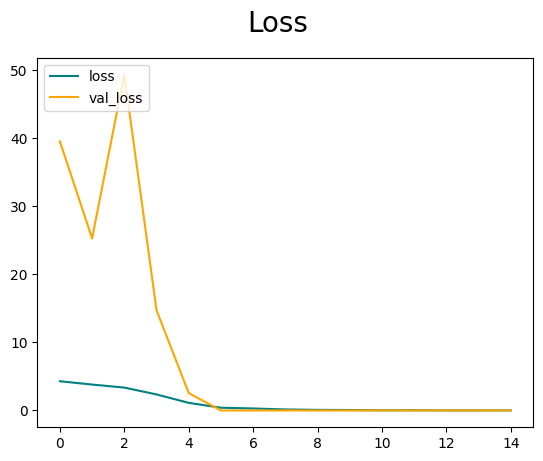

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

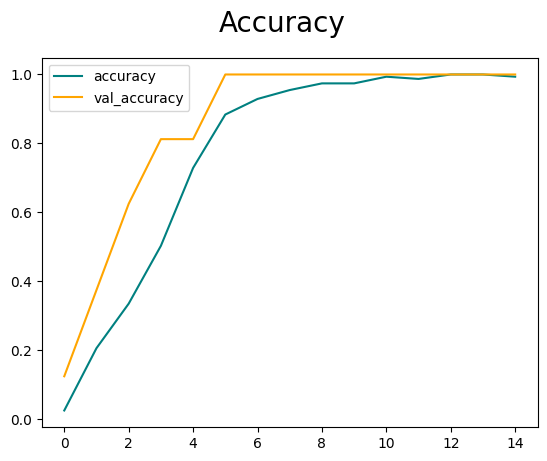

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 7. Saving the model

In [68]:
model.save(os.path.join('models','snippyclassifier.h5'))

In [ ]:
from tensorflow.keras.models import load_model

model_path = r"D:\snippy\models\snippyclassifier.h5"